In [66]:
#Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import  GradientBoostingClassifier,RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from sklearn import preprocessing

from sklearn.linear_model import  LinearRegression
import os, gc, warnings
warnings.filterwarnings('ignore')

In [67]:
f= r'‪C:\Users\Stina\Documents\train xl.xlsx'
f = f.lstrip('\u202a')
df = pd.read_excel(f)

In [68]:
df_test=pd.read_csv(r'C:\Users\Stina\Documents\LEARNING PYTHON\Data I work with\Titanic data\test.csv')

In [69]:
df_submit=pd.read_excel(r'‪‪C:\Users\Stina\Documents\LEARNING PYTHON\Data I work with\Titanic data\gender_submission.xlsx'.strip('\u202a'))

In [70]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [71]:
df['Survived'].value_counts()  #This shows that it's an imbalanced dataset, few people survived, and more died

#KStratified will work more here

0    549
1    342
Name: Survived, dtype: int64

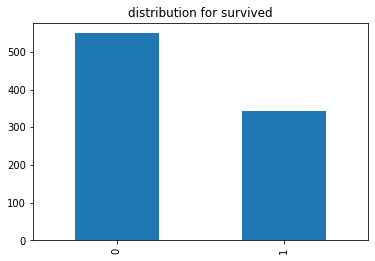

In [72]:
df['Survived'].value_counts().plot.bar(title='distribution for survived')


In [73]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
df[df.isna().any(axis=1)] #selecting rows with na value


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [75]:
df_test[df_test.isna().any(axis=1)] #selecting rows with na value


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
#Checking number of nan rows for each features in the train data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
#Checking number of nan rows for each features in the test data
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [78]:
#Working with the Cabin column
#Creating a new column that shows if a passenger has a cabin or not

df.loc[df['Cabin'].notnull(),'Cabin'] = 1
df.loc[df['Cabin'].isnull(),'Cabin'] = 0

df_test.loc[df_test['Cabin'].notnull(),'Cabin'] = 1
df_test.loc[df_test['Cabin'].isnull(),'Cabin'] = 0


In [79]:
df['Cabin']=df['Cabin'].astype(int)

In [80]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [81]:
#filling nan rows in the embarked column with the median 
df['Embarked'].fillna('S',inplace=True)

In [82]:
#Preprocessing categorical columns

le=preprocessing.LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])

df_test['Embarked']=le.fit_transform(df_test['Embarked'])
df_test['Sex']=le.fit_transform(df_test['Sex'])

In [83]:
#handling nan values in age column
df['Age'].fillna(np.mean(df['Age']),inplace = True)

df_test['Age'].fillna(np.mean(df_test['Age']),inplace = True)

In [84]:
#handling nan value in fare column
df_test['Fare'].fillna(np.mean(df_test['Fare']),inplace = True)

In [85]:
df['Ticket']=df['Ticket'].astype(str)
df['Ticket_type']=df['Ticket'].apply(lambda x: x[0:3])
df['Ticket_type']=df['Ticket_type'].astype('category')
df['Ticket_type']=df['Ticket_type'].cat.codes

df_test['Ticket']=df_test['Ticket'].astype(str)
df_test['Ticket_type']=df_test['Ticket'].apply(lambda x: x[0:3])
df_test['Ticket_type']=df_test['Ticket_type'].astype('category')
df_test['Ticket_type']=df_test['Ticket_type'].cat.codes

In [86]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0,2,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1,0,137
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,2,148
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,1,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0,2,23
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,2,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0,2,150
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1,0,1


In [87]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,330911,7.8292,0,1,58
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,363272,7.0000,0,2,71
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,240276,9.6875,0,1,32
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,315154,8.6625,0,2,55
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,3101298,12.2875,0,2,54
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,A.5. 3236,8.0500,0,2,96
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,PC 17758,108.9000,1,0,107
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,2,113
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,359309,8.0500,0,2,70


In [88]:
#Dropping irrelevant columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'],inplace=True)

df_test.drop(columns=['PassengerId', 'Name', 'Ticket'],inplace=True)

In [89]:
df.drop(columns=['Age'],inplace=True)

df_test.drop(columns=['Age'],inplace=True)

In [90]:
#Getting x and Y columns
y = np.array(df['Survived'])

In [91]:
x = np.array(df.drop(columns=['Survived']))

In [92]:
x_test = np.array(df_test)

In [93]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Ticket_type
0,0,3,1,1,0,7.2500,0,2,124
1,1,1,0,1,0,71.2833,1,0,137
2,1,3,0,0,0,7.9250,0,2,148
3,1,1,0,1,0,53.1000,1,2,3
4,0,3,1,0,0,8.0500,0,2,97
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,0,2,23
887,1,1,0,0,0,30.0000,1,2,2
888,0,3,0,1,2,23.4500,0,2,150
889,1,1,1,0,0,30.0000,1,0,1


In [94]:
#checking correlation between variables
df.corr() #there are no much correlation between the variables

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Ticket_type
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,0.316912,-0.167675,-0.168794
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,-0.725541,0.162098,0.340741
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,-0.140391,0.108262,0.059941
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.040460,0.068230,0.084882
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,0.036987,0.039798,0.027430
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,0.482075,-0.224719,-0.030822
Cabin,0.316912,-0.725541,-0.140391,-0.040460,0.036987,0.482075,1.000000,-0.160196,-0.281390
Embarked,-0.167675,0.162098,0.108262,0.068230,0.039798,-0.224719,-0.160196,1.000000,0.009975
Ticket_type,-0.168794,0.340741,0.059941,0.084882,0.027430,-0.030822,-0.281390,0.009975,1.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int32  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    int32  
 7   Embarked     891 non-null    int32  
 8   Ticket_type  891 non-null    int16  
dtypes: float64(1), int16(1), int32(3), int64(4)
memory usage: 47.1 KB


In [50]:
y.shape

(891,)

In [51]:
x.shape

(891, 10)

# Implementing Algorithm

In [38]:
skf = model_selection.StratifiedKFold(n_splits=4,random_state=1,shuffle=True)

In [ ]:
#Defining functions for the ensemble

In [39]:
def xgb_model(estimator,train,label,test):
    mean_train = []
    mean_test_val = []
    val_pred = np.zeros(train.shape[0])
    
    test_check = []
    
    for count, (train_index,test_index) in enumerate(skf.split(train,label)):
        x_train,x_test = train[train_index],train[test_index]
        y_train,y_test = label[train_index],label[test_index]
        print(f'========================Fold{count +1}==========================')
        estimator.fit(x_train, y_train, early_stopping_rounds = 200, eval_metric="auc",
                           eval_set=[(x_test, y_test)],verbose=250)
        train_predict = estimator.predict_proba(x_train, ntree_limit = estimator.get_booster().best_ntree_limit)[:,1]
        test_predict = estimator.predict_proba(x_test, ntree_limit = estimator.get_booster().best_ntree_limit)[:,1]
        val_pred[test_index] = test_predict
        
        test_check.append(estimator.predict_proba(test, ntree_limit = estimator.get_booster().best_ntree_limit)[:,1])
        
        print('\nTesting scores', roc_auc_score(y_test,test_predict))
        print('\nTraining scores', roc_auc_score(y_train,train_predict))
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
    print('Average Testing ROC score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training ROC score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred, test_check

In [40]:
def other_model(estimator,train,label,test):
    mean_train = []
    mean_test_val = []
    val_pred = np.zeros(train.shape[0])
    
    test_check = []
    
    for count, (train_index,test_index) in enumerate(skf.split(train,label)):
        x_train,x_test = train[train_index],train[test_index]
        y_train,y_test = label[train_index],label[test_index]
        print(f'========================Fold{count +1}==========================')
        estimator.fit(x_train, y_train)
        
        train_predict = estimator.predict(x_train)#_proba(x_train)[:,1]
        test_predict = estimator.predict(x_test)#_proba(x_test)[:,1]
        val_pred[test_index] = test_predict
        
        test_check.append(estimator.predict(test))#_proba(test)[:,1])
        
        print('\nTesting scores', roc_auc_score(y_test,test_predict))
        print('\nTraining scores', roc_auc_score(y_train,train_predict))
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
    print('Average Testing ROC score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training ROC score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred,test_check


In [41]:
def lgb_model(estimator,train,label,test):
    mean_train = []
    mean_test_val = []
    val_pred = np.zeros(train.shape[0])
    
    test_check =[]
    
    for count, (train_index,test_index) in enumerate(skf.split(train,label)):
        x_train,x_test = train[train_index],train[test_index]
        y_train,y_test = label[train_index],label[test_index]
        print(f'========================Fold{count +1}==========================')
        estimator.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=200,
                               verbose=250)
        train_predict = estimator.predict_proba(x_train, num_iteration = estimator.best_iteration_)[:,1]
        test_predict = estimator.predict_proba(x_test, num_iteration = estimator.best_iteration_)[:,1]
        val_pred[test_index] = test_predict
        
        test_check.append(estimator.predict_proba(test)[:,1])
        
        print('\nValidation scores', roc_auc_score(y_test,test_predict))
        print('\nTraining scores', roc_auc_score(y_train,train_predict))
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
    print('Average Testing ROC score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training ROC score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred, test_check

In [42]:
xgb_model1=xgb.XGBClassifier(random_state=5,learning_rate=0.01,n_estimators=4000)

In [43]:
xgb_model2=xgb.XGBClassifier(random_state=100,learning_rate=0.008,n_estimators=3000)

In [44]:
lgb_model1 = lgbm.LGBMClassifier(random_state=34, n_estimators=5000,colsample_bytree=0.9,min_child_samples=10,
    subsample=0.7,subsample_freq=2,num_leaves=120,reg_lambda=2,reg_alpha=5 ,metric='auc', learning_rate=0.008,
    max_depth=5)

In [45]:
lgb_model2 = lgbm.LGBMClassifier(random_state=10, n_estimators=5000,colsample_bytree=0.9,min_child_samples=50,
    subsample=0.9,subsample_freq=2,num_leaves=150,reg_lambda=2,reg_alpha=5 ,metric='auc', learning_rate=0.009,
    max_depth=10)

In [168]:
rf_model1 = RandomForestClassifier(max_depth=10,min_samples_split=10,min_samples_leaf=15,n_estimators=400,
                                  n_jobs=-1,random_state=34)

In [169]:
gradient_model1 = GradientBoostingClassifier(random_state=1,learning_rate=0.01,n_estimators=3000)

In [170]:
XGB1_train, XGB1_test = xgb_model(xgb_model1, x, y, x_test)

========================Fold1==========================
[0]	validation_0-auc:0.82306
Will train until validation_0-auc hasn't improved in 200 rounds.
[250]	validation_0-auc:0.82886
[500]	validation_0-auc:0.83640
[750]	validation_0-auc:0.83789
[1000]	validation_0-auc:0.84028
[1250]	validation_0-auc:0.84139
Stopping. Best iteration:
[1199]	validation_0-auc:0.84275


Testing scores 0.8427536231884059

Training scores 0.9777755687466273
========================Fold2==========================
[0]	validation_0-auc:0.87888
Will train until validation_0-auc hasn't improved in 200 rounds.
[250]	validation_0-auc:0.88644
[500]	validation_0-auc:0.89187
[750]	validation_0-auc:0.89802
[1000]	validation_0-auc:0.89963
Stopping. Best iteration:
[1043]	validation_0-auc:0.90099


Testing scores 0.9009930402308606

Training scores 0.9736138501213591
========================Fold3==========================
[0]	validation_0-auc:0.83263
Will train until validation_0-auc hasn't improved in 200 rounds.
[250]	va

In [98]:
LGB1_train,LGB1_test = lgb_model(lgb_model1,x,y,x_test)

========================Fold1==========================
Training until validation scores don't improve for 200 rounds
[250]	valid_0's auc: 0.821526
Early stopping, best iteration is:
[61]	valid_0's auc: 0.823956

Validation scores 0.8239556692242116

Training scores 0.8831974779175779
========================Fold2==========================
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.888983

Validation scores 0.8889831947037855

Training scores 0.8635230203276698
========================Fold3==========================
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.838313

Validation scores 0.8383126803598708

Training scores 0.8676331158980584
========================Fold4==========================
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 0.889051

Validation scores 0.8

In [99]:
LGB2_train, LGB2_test = lgb_model(lgb_model2, x ,y,x_test)

========================Fold1==========================
Training until validation scores don't improve for 200 rounds
[250]	valid_0's auc: 0.820801
[500]	valid_0's auc: 0.822379
Early stopping, best iteration is:
[365]	valid_0's auc: 0.824893

Validation scores 0.8248934356351236

Training scores 0.8901606596798166
========================Fold2==========================
Training until validation scores don't improve for 200 rounds
[250]	valid_0's auc: 0.875403
Early stopping, best iteration is:
[56]	valid_0's auc: 0.878883

Validation scores 0.8788830419283653

Training scores 0.8514961316747574
========================Fold3==========================
Training until validation scores don't improve for 200 rounds
[250]	valid_0's auc: 0.833517
Early stopping, best iteration is:
[94]	valid_0's auc: 0.836106

Validation scores 0.8361059242912918

Training scores 0.8666328504247572
========================Fold4==========================
Training until validation scores don't improve for 200 

In [100]:
XGB2_train, XGB2_test = xgb_model(xgb_model2, x,y,x_test)

========================Fold1==========================
[0]	validation_0-auc:0.82306
Will train until validation_0-auc hasn't improved in 200 rounds.
Stopping. Best iteration:
[1]	validation_0-auc:0.82630


Testing scores 0.8263000852514919

Training scores 0.907783994622587
========================Fold2==========================
[0]	validation_0-auc:0.87888
Will train until validation_0-auc hasn't improved in 200 rounds.
Stopping. Best iteration:
[34]	validation_0-auc:0.88257


Testing scores 0.882575114581565

Training scores 0.895341891686893
========================Fold3==========================
[0]	validation_0-auc:0.83263
Will train until validation_0-auc hasn't improved in 200 rounds.
[250]	validation_0-auc:0.84158
[500]	validation_0-auc:0.85087
[750]	validation_0-auc:0.85533
[1000]	validation_0-auc:0.85508
Stopping. Best iteration:
[815]	validation_0-auc:0.85643


Testing scores 0.8564335426922424

Training scores 0.9652988470873786
========================Fold4===============

In [147]:
GBB1_train, GBB1_test = other_model(gradient_model1,x,y,x_test)

========================Fold1==========================

Testing scores 0.7872549019607844

Training scores 0.9379798725704602
========================Fold2==========================

Testing scores 0.8464182651502292

Training scores 0.9256295509708738
========================Fold3==========================

Testing scores 0.785308097097267

Training scores 0.9207182949029127
========================Fold4==========================

Testing scores 0.8010304851867754

Training scores 0.9197895810509614
Average Testing ROC score for 10 folds split: 0.805002937348764
Average Training ROC score for 10 folds split: 0.926029324873802
standard Deviation for 10 folds split: 0.024667231531664977


In [171]:
Rf1_train, Rf1_test = other_model(rf_model1,x,y,x_test)

========================Fold1==========================

Testing scores 0.7117220801364024

Training scores 0.7901104831151126
========================Fold2==========================

Testing scores 0.7723221863860126

Training scores 0.7968370752427184
========================Fold3==========================

Testing scores 0.7540740112035307

Training scores 0.80444098907767
========================Fold4==========================

Testing scores 0.7943323314727351

Training scores 0.7884949567451173
Average Testing ROC score for 10 folds split: 0.7581126522996702
Average Training ROC score for 10 folds split: 0.7949708760451546
standard Deviation for 10 folds split: 0.030340450828429785


In [103]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Ticket_type    0
dtype: int64

In [148]:

lgb1 = pd.Series(LGB1_train)
lgb2 = pd.Series(LGB2_train)
xgb1 = pd.Series(XGB1_train)
xgb2 = pd.Series(XGB2_train)
gbb1 = pd.Series(GBB1_train)
rf1 = pd.Series(Rf1_train)

In [149]:
#Concatenating the train predictions
df_train=pd.concat([lgb1,lgb2,xgb1,xgb2,gbb1,rf1],1)

In [150]:
#Converting the mean of the predictions to series
lgb1_test = pd.Series(np.mean(LGB1_test,0))
lgb2_test = pd.Series(np.mean(LGB2_test,0))
xgb1_test = pd.Series(np.mean(XGB1_test,0))
xgb2_test = pd.Series(np.mean(XGB2_test,0))
gbb1_test = pd.Series(np.mean(GBB1_test,0))
rf1_test = pd.Series(np.mean(Rf1_test,0))

In [151]:
##Concatenating the test_check predictions
Df_test=pd.concat([lgb1_test,lgb2_test,xgb1_test,xgb2_test,gbb1_test,rf1_test],1)

In [152]:
new_train=np.array(df_train)

In [153]:
new_test=np.array(Df_test)

In [154]:
#I used linear regression as the meta classifier since I'm predicting the continous values of the prediction
model = LinearRegression()
model.fit(new_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
pred = model.predict(new_test)

In [157]:
pred=np.round(pred).astype(int)

In [158]:
df_submit['Survived'] = pred

In [159]:
df_submit.to_csv('15-Titanic.csv', index=False)

In [ ]:
# This notebook gave an accuracy of 0.79665